In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('dataset.csv')
df

,X1,X2,Y
0,31,46,1
1,33,38,1
2,33,39,1
3,32,37,0
4,32,43,1
5,33,42,0
6,31,45,1
7,36,45,1
8,31,34,0
9,32,37,1


In [5]:
df.describe()

,X1,X2,Y
count,50.000000,50.000000,50.000000
mean,32.460000,40.380000,0.480000
std,4.603504,2.769292,0.504672
min,3.000000,34.000000,0.000000
25%,32.000000,38.000000,0.000000
50%,33.000000,41.000000,0.000000
75%,34.000000,42.000000,1.000000
max,36.000000,46.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      50 non-null     int64
 1   X2      50 non-null     int64
 2   Y       50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [7]:
df.isnull().sum()

X1    0
X2    0
Y     0
dtype: int64

In [8]:
X=df.drop(['Y'],axis=1)
Y=df['Y']
X.shape, Y.shape

((50, 2), (50,))

In [9]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns.values)
X

,X1,X2
0,-0.320370,2.050003
1,0.118493,-0.868151
2,0.118493,-0.503382
3,-0.100938,-1.232920
4,-0.100938,0.955695
5,0.118493,0.590926
6,-0.320370,1.685234
7,0.776787,1.685234
8,-0.320370,-2.327228
9,-0.100938,-1.232920


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
print(model.coef_)

[[-0.17972918  1.11481579]]


In [13]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0,0
1,0,1
2,1,1
3,0,0
4,1,0


In [14]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))
print("Precision : ",metrics.precision_score(y_test, y_pred))
print("Recall : ",metrics.recall_score(y_test, y_pred))

Accuracy :  0.8
Precision :  0.75
Recall :  0.75


Text(0.5, 23.52222222222222, 'True')

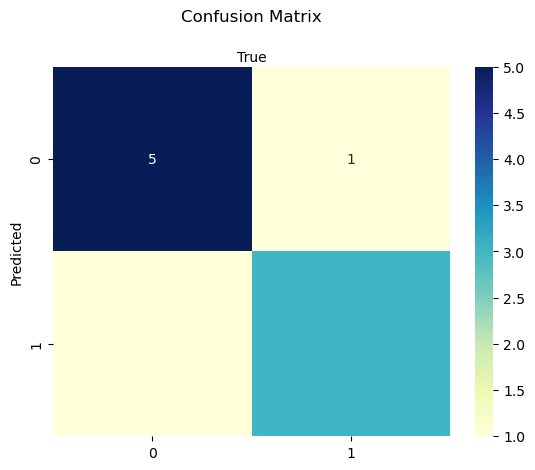

In [15]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Predicted')
plt.xlabel('True')

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5, 1],
       [1, 3]], dtype=int64)